A Gaussian pyramid is basically a series of increasingly decimated images, 
traditionally at downsampling rate r=2. At each level, the image is first blurred by convolving with a Gaussian-like filter to prevent aliasing
in the downsampled image. We then move up a level in the Gaussian pyramid by downsampling the image (halving each dimension). 
To build the Laplacian pyramid, we take each level of the Gaussian pyramid and 
subtract from it the next level interpolated to the same size.

# Requirements

In [ ]:
import numpy as np,sys
import scipy.signal as sig
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage, sparse
import imageio
import cv2

from google.colab.patches import cv2_imshow

# import scipy.sparse
from scipy.sparse.linalg import spsolve

# 1 (5pts) Plot both continuous and discrete signals of the function

\begin{equation}
x(t) = 325 \sin(2\pi50t)\\
\end{equation}

<center> And also the discrete signals</center>
</br>

\begin{equation}
x(n) = 325 \sin(2\pi 50n\Delta t)\\
\end{equation}
<center> Where n is sampled from 0 to 50. </center> 

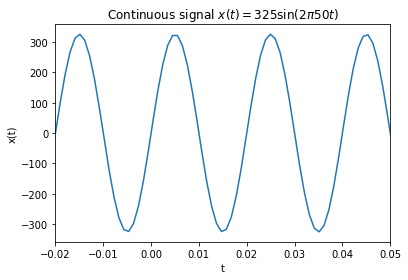

In [ ]:
t = np.linspace(-0.02, 1, 1000)

plt.plot(t, 325 * np.sin(2*np.pi*50*t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Continuous signal $x(t)=325 \sin(2\pi 50 t)$')
plt.xlim([-0.02, 0.05])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

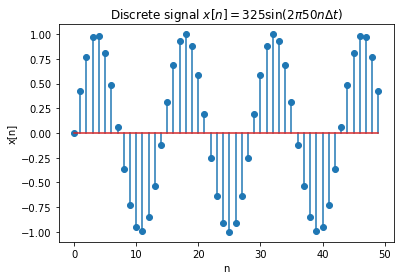

In [ ]:
n = np.arange(50)
dt = 0.07/50 # 7 peaks and valleys combined
x = np.sin(2 * np.pi * 50 * n * dt)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title(r'Discrete signal $x[n] = 325 \sin(2\pi 50 n \Delta t)$')
plt.stem(n, x)

# 2	(5pts) Consider a complex-valued signal, \$x(t)=e^{j 100 \pi t}\$ Can you plot the real and imaginary part Of the function when t have a range of (-0.02, 0.05)?
\begin{equation}
\end{equation}

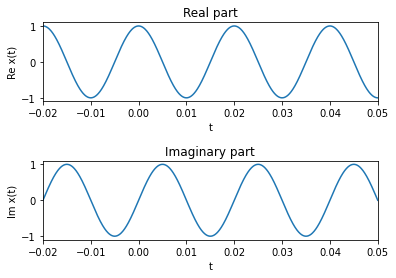

In [ ]:
t = np.linspace(-0.02, 0.05, 1000)
plt.subplot(211), plt.plot(t, np.exp(2j*np.pi*50*t).real)
plt.xlabel('t')
plt.ylabel('Re x(t)')
plt.title('Real part')
plt.xlim([-0.02, 0.05])
plt.subplot(212), plt.plot(t, np.exp(2j*np.pi*50*t).imag)
plt.xlabel('t')
plt.ylabel('Im x(t)')
plt.title('Imaginary part')
plt.xlim([-0.02, 0.05])

plt.subplots_adjust(hspace = .75)

plt.show()

# 3 (5pts) In this exercise, we want to generate the same plot as Slide No. 20 in the lecture9 slides (Figure 1.20 in Chapter SignalProcessing.pdf).  Figure see below. 

Take a 1D discrete signal, eg. f[n], show that the foureier transform 
Of a translated signal f[n-x] and its left-right mirror signal would have resulted in the same magnitude.  Basically, use numpy.fft and matplotlib, generate the following graphs. You can use a different f[n], use N= 32 as the Fourier coefficients. 


In [ ]:
# Hint: you can use similar code to create discrete signals in numpy:
# t = np.linspace(0,20,N)
# x = np.exp(-t/3)*np.cos(2*t)
# n = np.arange(50)
# dt = 0.001
# x = np.sin(2*np.pi*50*n*dt)

N = 32
t = np.linspace(0,32,N)
x = np.exp(-t/3)*np.cos(2*t)

# A
a = np.array([0,0,0,0,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
a_fft = np.fft.fft(a)

# B
b = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
b_fft = np.fft.fft(b)

# C
c = np.array([0,0,0,0,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
c_fft = np.fft.fft(c)

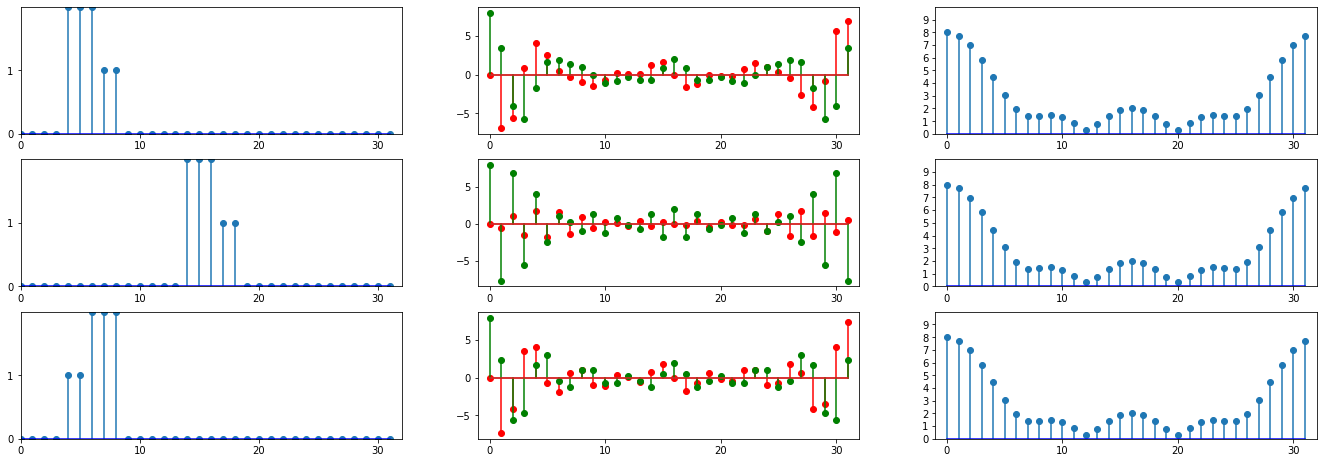

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# A
plt.subplot(331), plt.stem(np.abs(a), basefmt='b')
plt.xlim(0,32)
plt.xticks(np.arange(0, 32, 10))
plt.ylim(0,2)
plt.yticks(np.arange(0, 2, 1))

plt.subplot(332), plt.stem(a_fft.imag, linefmt='r', markerfmt='ro')
plt.subplot(332), plt.stem(a_fft.real, linefmt='g', markerfmt='go')
plt.xlim(-1,32)
plt.xticks(np.arange(0, 32, 10))

plt.subplot(333), plt.stem(np.abs(a_fft), basefmt='b')
plt.xlim(-1,32)
plt.xticks(np.arange(0, 32, 10))
plt.ylim(0,10)
plt.yticks(np.arange(0, 10, 1))

# B
plt.subplot(334), plt.stem(np.abs(b), basefmt='b')
plt.xlim(0,32)
plt.xticks(np.arange(0, 32, 10))
plt.ylim(0,2)
plt.yticks(np.arange(0, 2, 1))

plt.subplot(335), plt.stem(b_fft.imag, linefmt='r', markerfmt='ro')
plt.subplot(335), plt.stem(b_fft.real, linefmt='g', markerfmt='go')
plt.xlim(-1,32)
plt.xticks(np.arange(0, 32, 10))

plt.subplot(336), plt.stem(np.abs(b_fft), basefmt='b')
plt.xlim(-1,32)
plt.xticks(np.arange(0, 32, 10))
plt.ylim(0,10)
plt.yticks(np.arange(0, 10, 1))

# C
plt.subplot(337), plt.stem(np.abs(c), basefmt='b')
plt.xlim(0,32)
plt.xticks(np.arange(0, 32, 10))
plt.ylim(0,2)
plt.yticks(np.arange(0, 2, 1))

plt.subplot(338), plt.stem(c_fft.imag, linefmt='r', markerfmt='ro')
plt.subplot(338), plt.stem(c_fft.real, linefmt='g', markerfmt='go')
plt.xlim(-1,32)
plt.xticks(np.arange(0, 32, 10))

plt.subplot(339), plt.stem(np.abs(c_fft), basefmt='b')
plt.xlim(-1,32)
plt.xticks(np.arange(0, 32, 10))
plt.ylim(0,10)
plt.yticks(np.arange(0, 10, 1))

plt.subplots_adjust(wspace=0.2, hspace=0.2, top=1.5, bottom=0, left=0,
                    right=3)

plt.show()

# 4 (5pts) Plot the Fourier transform of the following function for frequency below 50hz, using the numpy.fft

\begin{equation}
\frac{1}{(1 + 0.99 cos(2\pi t))}
\end{equation}

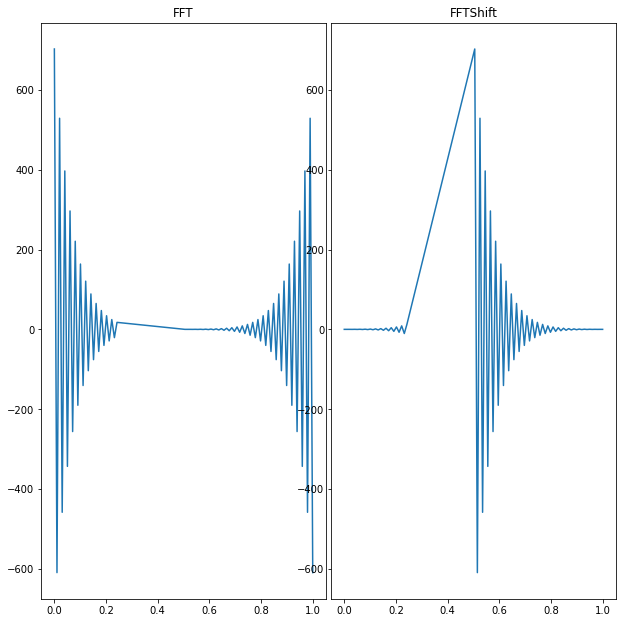

In [ ]:
N = 100
t = np.linspace(0.,1.,N)
y = 1/(1+0.99*np.cos(2 * np.pi * t))

fft = np.fft.fft(y)
fshift = np.fft.fftshift(fft)
freqs = np.fft.fftfreq(len(t), 0.005)
f_cutoff_50 = fft[freqs < 50]
fft_cutoff_50 = fshift[freqs < 50]

t_cutoff = t[freqs<50]

# plt.plot(t,f)
plt.subplot(131), plt.plot(t_cutoff, np.real(f_cutoff_50))
plt.title("FFT")
plt.subplot(132), plt.plot(t_cutoff, np.real(fft_cutoff_50))
plt.title("FFTShift")

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=2, bottom=0, left=0,
                    right=2)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

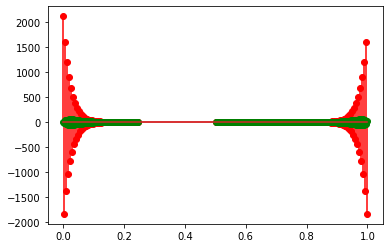

In [ ]:
t = np.linspace(0,1,300)
y = 1/(1+0.99*np.cos(2*np.pi*t))
fft = np.fft.fft(y)
freqs = np.fft.fftfreq(len(t), 0.005)
fft_less_50 = fft[freqs < 50]
t_less_50 = t[freqs<50]
plt.stem(t_less_50,np.real(fft_less_50),'r', markerfmt='ro')
plt.stem(t_less_50,np.imag(fft_less_50),'g', markerfmt='go')

# 5 (5pts) Create the following 2D sine wave grating patterns as images and show their 2D Fourier transforms of the three images. You must plot both thee input images in real domain and the Fourier domain.



*   u = 2, v = 0
*   u = 3, v = 1
*   u = 7, v = -5



## Method 1

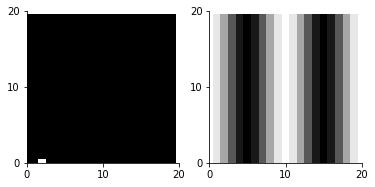

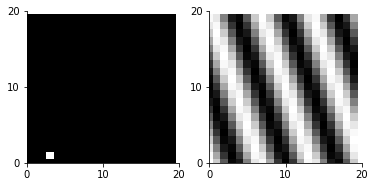

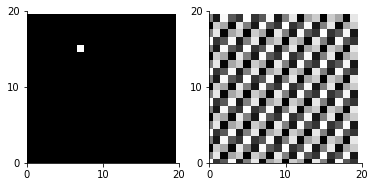

In [ ]:
def f(u,v):
  N, M = 20, 20
  xy = np.zeros((M,N))

  xy[int(M/2)+v, int(N/2)+u] = 1

  plt.subplot(121), plt.imshow(np.fft.fftshift(xy), cmap='gray')
  plt.gca().invert_yaxis()
  plt.xlim(0,20)
  plt.xticks(np.arange(0, 21, 10))
  plt.ylim(0,20)
  plt.yticks(np.arange(0, 21, 10))
  plt.gca().spines['right'].set_color('none')
  plt.gca().spines['top'].set_color('none')
  plt.subplot(122), plt.imshow(np.real(np.fft.fft2(np.fft.fftshift(xy))), cmap='gray')
  plt.gca().invert_yaxis()
  plt.xlim(0,20)
  plt.xticks(np.arange(0, 21, 10))
  plt.ylim(0,20)
  plt.yticks(np.arange(0, 21, 10))
  plt.gca().spines['right'].set_color('none')
  plt.gca().spines['top'].set_color('none')

  plt.show()

f(2,0)
f(3,1)
f(7,-5)

## Method 2

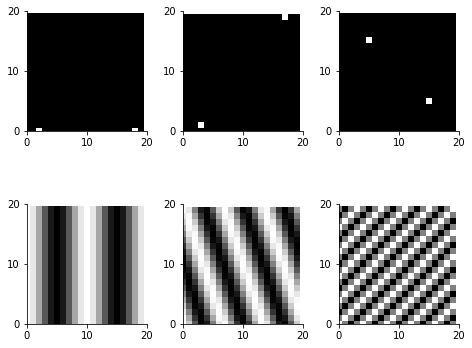

In [ ]:
# np.sin(2*np.pi*((u*n/N) + (v*m/M))
# def my_function(u,v):
  # N, M = 20, 20
  # xy = np.zeros((M,N))

  # xy[M//2-v, N//2+u] = 1
  # xy[M//2+v, N//2-u] = 1

N = 20
M = 20

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
af = np.zeros((N,M))
af[0, 2] = 1
af[0, N-2] = 1
A = np.fft.fft2(af)
A = np.fft.fftshift(A)
A2 = np.abs(A)

bf = np.zeros((N, N))
bf[1, 3] = 1
bf[N-1, N-3] = 1
B = np.fft.fft2(bf)
B = np.fft.fftshift(B)
B2 = np.abs(B)

cf = np.zeros((N, N))
cf[N-5, 5] = 1
cf[5, N-5] = 1
C = np.fft.fft2(cf)
C = np.fft.fftshift(C)
C2 = np.abs(C)

plt.subplot(331), plt.imshow(af, cmap='gray')
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 10))
plt.ylim(0,20)
plt.yticks(np.arange(0, 21, 10))
plt.subplot(332), plt.imshow(bf, cmap='gray')
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 10))
plt.ylim(0,20)
plt.yticks(np.arange(0, 21, 10))
plt.subplot(333), plt.imshow(cf, cmap='gray')
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 10))
plt.ylim(0,20)
plt.yticks(np.arange(0, 21, 10))
plt.subplot(334), plt.imshow(np.real(A), cmap='gray')
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 10))
plt.ylim(0,20)
plt.yticks(np.arange(0, 21, 10))
plt.subplot(335), plt.imshow(np.real(B), cmap='gray')
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 10))
plt.ylim(0,20)
plt.yticks(np.arange(0, 21, 10))
plt.subplot(336), plt.imshow(np.real(C), cmap='gray')
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, 10))
plt.ylim(0,20)
plt.yticks(np.arange(0, 21, 10))

plt.subplots_adjust(wspace=0.3, hspace=0.02, top=2, bottom=0, left=0,
                    right=1)

plt.show()

# 6	(25pts) Pyramid Blending:   Write a program that takes an input two color images and a binary mask images and produces the Laplacian pyramid blend of the two images.

*   Construct the Laplacian pyramid for each image.
*   Construct the Gaussian pyramid for the two mask images (the input image and its complement)
*   Multiply each Laplacian image by its corresponding mask and sum the images 
*   Reconstruct the final image from the Blended Laplacian pyramid. 


## Starter Codes

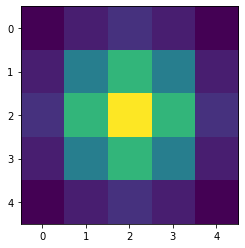

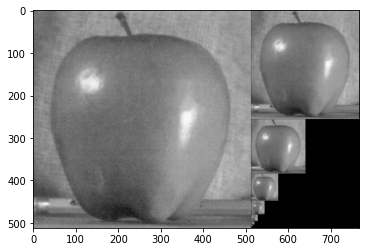

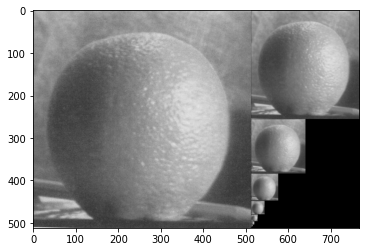

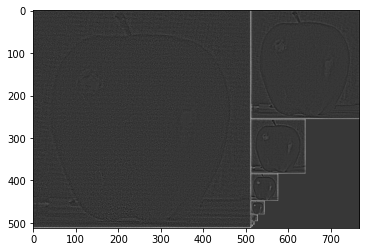

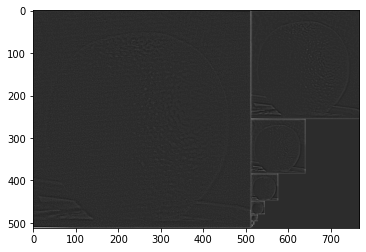

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 19 09:08:16 2015
A Gaussian pyramid is basically a series of increasingly decimated images, 
traditionally at downsampling rate r=2. At each level, the image is first blurred by convolving with a Gaussian-like filter to prevent aliasing
in the downsampled image. We then move up a level in the Gaussian pyramid by downsampling the image (halving each dimension). 
To build the Laplacian pyramid, we take each level of the Gaussian pyramid and 
subtract from it the next level interpolated to the same size.

@author: bxiao from http://pauljxtan.com/blog/011315/

"""
import numpy as np
import scipy.signal as sig
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage

# img = scipy.misc.imread('apple.jpg',flatten=1)
img = imageio.imread('apple.jpg',as_gray=True)
img2 = imageio.imread('orange.jpg',as_gray=True)
mask = imageio.imread('mask.jpg',as_gray=True)
# img.flatten()

# create a  Binomial (5-tap) filter
kernel = (1.0/256)*np.array([[1, 4,  6,  4,  1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4,  6,  4,  1]])

plt.imshow(kernel)
plt.show()
#img_up = np.zeros((2*img.shape[0], 2*img.shape[1]))
#img_up[::2, ::2] = img
#ndimage.filters.convolve(img_up,4*kernel, mode='constant')

#sig.convolve2d(img_up, 4*kernel, 'same')

def interpolate(image):
    """
    Interpolates an image with upsampling rate r=2.
    """
    image_up = np.zeros((2*image.shape[0], 2*image.shape[1]))
    # Upsample
    image_up[::2, ::2] = image
    # Blur (we need to scale this up since the kernel has unit area)
    # (The length and width are both doubled, so the area is quadrupled)
    #return sig.convolve2d(image_up, 4*kernel, 'same')
    return ndimage.filters.convolve(image_up,4*kernel, mode='constant')
                                
def decimate(image):
    """
    Decimates at image with downsampling rate r=2.
    """
    # Blur
    #image_blur = sig.convolve2d(image, kernel, 'same')
    image_blur = ndimage.filters.convolve(image,kernel, mode='constant')
    # Downsample
    return image_blur[::2, ::2]                                
               
                                                 
# here is the constructions of pyramids
def pyramids(image):
    """
    Constructs Gaussian and Laplacian pyramids.
    Parameters :
        image  : the original image (i.e. base of the pyramid)
    Returns :
        G   : the Gaussian pyramid
        L   : the Laplacian pyramid
    """
    # Initialize pyramids
    G = [image, ]
    L = []

    # Build the Gaussian pyramid to maximum depth
    while image.shape[0] >= 2 and image.shape[1] >= 2:
        image = decimate(image)
        G.append(image)
        

    # Build the Laplacian pyramid
    for i in range(len(G) - 1):
        L.append(G[i] - interpolate(G[i + 1]))

    return G[:-1], L
                                
#interpolate(img)
#decimate(img)
[G,L] = pyramids(img)
[G2,L2] = pyramids(img2)
[GM,LM] = pyramids(mask)

# reconstruct the pyramids, here you write a reconstruct function that takes the 
# pyramid and upsampling the each level and add them up. 
#def reconstruct(L,G):

# opple
rows, cols = img.shape
composite_image = np.zeros((rows, cols + int(cols/2)), dtype=np.double)
composite_image[:rows, :cols] = G[0]

i_row = 0
for p in G[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows


fig, ax = plt.subplots()
ax.imshow(composite_image,cmap='gray')
plt.show()


rows, cols = img.shape
composite_image = np.zeros((rows, cols + int(cols/2)), dtype=np.double)
composite_image[:rows, :cols] = L[0]

i_row = 0
for p in L[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

# orange
rows, cols = img2.shape
composite_image2 = np.zeros((rows, cols + int(cols/2)), dtype=np.double)
composite_image2[:rows, :cols] = G2[0]

i_row = 0
for p in G2[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image2[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows


fig, ax = plt.subplots()
ax.imshow(composite_image2,cmap='gray')
plt.show()


rows, cols = img2.shape
composite_image2 = np.zeros((rows, cols + int(cols/2)), dtype=np.double)
composite_image2[:rows, :cols] = L2[0]

i_row = 0
for p in L2[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image2[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

# plot
fig, ax = plt.subplots()
ax.imshow(composite_image,cmap='gray')
plt.show()

fig, ax = plt.subplots()
ax.imshow(composite_image2,cmap='gray')
plt.show()

real = np.hstack((img[:,0:int(cols/2)], img2[:,int(cols/2):]))

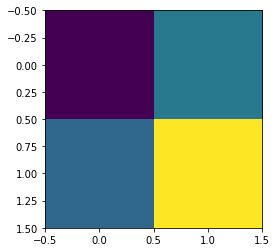

In [ ]:
# cv2_imshow(img)
# cv2_imshow(img2)
# cv2_imshow(composite_image)
# cv2_imshow(composite_image2)
plt.imshow(L[8]) # last layer

## Manual Approach

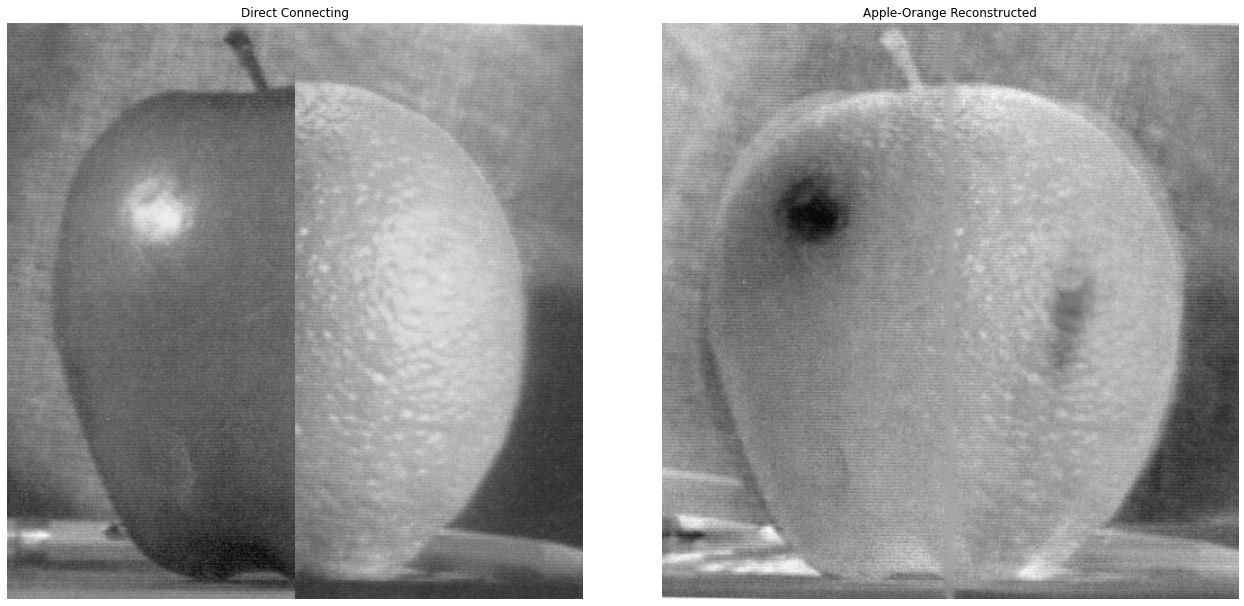

In [ ]:
def blend(left, right, mask):
  # Iterate over each level to calculate the blended pyramid
  blended = []
  for i in range(len(mask)):
    #blended.append(mask[i]*left[i] + (1 -  mask[i])*right[i])
    #blended.append(np.flip(mask[i])*left[i] + (1 -  np.flip(mask[i]))*right[i])
    blended.append((mask[i]*left[i] + (1 -  mask[i])*right[i]) + (np.flip(mask[i])*left[i] + (1 -  np.flip(mask[i]))*right[i]))
    #blended.append((np.flip(mask[i])*left[i] + (1 -  np.flip(mask[i]))*right[i]) + (mask[i]*left[i] + (1 -  mask[i])*right[i])) 
  return blended

blended = blend(L2,L,GM)
# blended2 = blend(L,L2,GM)

def collapse(pyramid):
  # Iterate over pyramid levels starting from smallest (in reverse)
  output = pyramid[len(pyramid)-1]
  for i in range(len(pyramid)-1, 0, -1):
    # Expand smaller level to next level
    expanded = interpolate(output)

    # Flatten expanded onto next level
    output = expanded + pyramid[i - 1]
  return output

ao_reconstructed = collapse(blended)
# ao_reconstructed2 = collapse(blended2)

plt.subplot(121), plt.imshow(real, cmap='gray')
plt.axis("off")
plt.title("Direct Connecting")
plt.subplot(122), plt.imshow(ao_reconstructed, cmap='gray')
plt.axis("off")
plt.title("Apple-Orange Reconstructed")
# plt.subplot(133), plt.imshow(ao_reconstructed2, cmap='gray')
# plt.axis("off")
#plt.title("Orange-Apple Reconstructed")

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=2, bottom=0, left=0,
                    right=3)

plt.show()

## CV2 - Approach

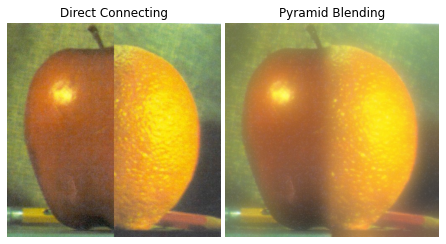

In [ ]:
A = cv2.imread('apple.jpg')
O = cv2.imread('orange.jpg')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = O.copy()
gpO = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpO.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpO = [gpO[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpO[i])
    L = cv2.subtract(gpO[i-1],GE)
    lpO.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpO):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# direct connecting each half and pyramid blending
real = np.hstack((A[:,:int(cols/2)],O[:,int(cols/2):]))

# plot both plots
plt.subplot(121), plt.imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Direct Connecting")
plt.subplot(122), plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Pyramid Blending")

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=2, bottom=0, left=0,
                    right=1)

plt.show()

# Bells & Whistles (Extra Points)


*   (5pts) Be exceptional creative of acquiring and your choices of source and target images.
*   (5pts) You can discuss the shortcomings you discovered with the Pyramid method. When does the method fail?
*   (5pts) Implement the two-band Laplacian blending described in Brown and Lowe, Recognizing Panaroams, ICCV  2003. You can simply jumpt to section 5, last  two paragraphs. Compare with the multi-band method you have already have implemented.  
*   (5pts) Implement Poisson image blending (Perez03). See attached paper. 


## (5pts) Be exceptional creative of acquiring and your choices of source and target images.

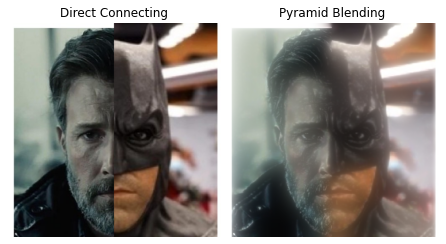

In [ ]:
ben = cv2.imread('BenAffleck2.jpg')
bat = cv2.imread('batman2.jpg')

# generate Gaussian pyramid for Ben Affleck
G = ben.copy()
gpben = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpben.append(G)

# generate Gaussian pyramid for Batman
G = bat.copy()
gpbat = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpbat.append(G)

# generate Laplacian Pyramid for Ben Affleck
lpben = [gpben[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpben[i])
    L = cv2.subtract(gpben[i-1],GE)
    lpben.append(L)

# generate Laplacian Pyramid for Batman
lpbat = [gpbat[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpbat[i])
    L = cv2.subtract(gpbat[i-1],GE)
    lpbat.append(L)

# add left and right halves of images in each level
LS = []
for la,lb in zip(lpben,lpbat):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)

# reconstruct images
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# direct connecting each half and pyramid blending
real = np.hstack((ben[:,:int(cols/2)],bat[:,int(cols/2):]))

# plot both plots
plt.subplot(121), plt.imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Direct Connecting")
plt.subplot(122), plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Pyramid Blending")

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=2, bottom=0, left=0,
                    right=1)

plt.show()

## (5pts) You can discuss the shortcomings you discovered with the Pyramid method. When does the method fail?

**ANSWER:** While going through the Ben Affleck and Batman blending, I noticed a few issues that required correction. Due to some of the issues I encountered, many of my attemmpts failed til I corrected the images. Below are a list of some the shortcomings I discovered:


*   Images should have similiar sizes.
*   Heads position should be similar. For example, the misalignment of the faces/heads were very noticeable when Ben Affleck face was angled to the side.
*   Blending does not work too well if one of the faces is smiling while the other is at a neutral position. Generally, the lips/mouths should be similar.
*   It helps to have the faces centered both vertically and horizontally
*   Due to the mask on Batman, it caused issues with Ben Affleck fullsome hair.


## (5pts) Implement Poisson image blending (Perez03). See attached paper.

**ANSWER:** The idea is to reduce color mismatch between source and target images then create composite in gradient domain. The goal is to have the gradient of the composite inside \$\Omega\$  to look as close as possible to the source image gradient while matching the target image on the boundary \$\partial\Omega\$.

\begin{equation}
\end{equation}

### Requirements and Laplacian matrix

In [ ]:
import numpy as np
import cv2
import scipy.sparse
from scipy.sparse.linalg import spsolve

In [ ]:
def laplacian_matrix(n, m):   
    mat_l = sparse.lil_matrix((m, m))
    mat_l.setdiag(-1, -1)
    mat_l.setdiag(4)
    mat_l.setdiag(-1, 1)
        
    mat_A = sparse.block_diag([mat_l] * n).tolil()
    
    mat_A.setdiag(-1, 1*m)
    mat_A.setdiag(-1, -1*m)
    
    return mat_A

laplacian_matrix(3, 3).todense()

matrix([[ 4., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  4., -1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  4.,  0.,  0., -1.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  4., -1.,  0., -1.,  0.,  0.],
        [ 0., -1.,  0., -1.,  4., -1.,  0., -1.,  0.],
        [ 0.,  0., -1.,  0., -1.,  4.,  0.,  0., -1.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  4., -1.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0., -1.,  4., -1.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  4.]])

### Reading the images

Source size: (800, 1200)


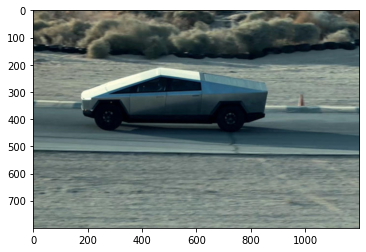

Target size: (800, 1200)


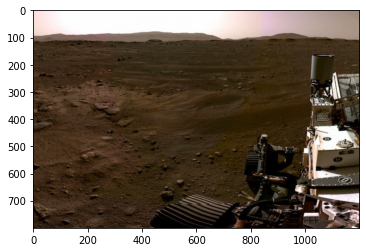

Mask size: (800, 1200)


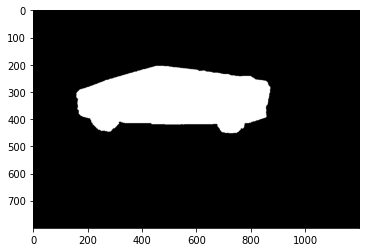

In [ ]:
source = cv2.imread('cybertruck.jpg')
target = cv2.imread('mars.jpg')
mask = cv2.imread('cybertruck-mask.jpg', cv2.IMREAD_GRAYSCALE)
offset = (0, 10)

print('Source size:', source.shape[:-1])
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.show()
print('Target size:', target.shape[:-1])
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.show()
print('Mask size:', mask.shape)
plt.imshow(mask, cmap='gray')
plt.show()

Source image: (800, 1200)


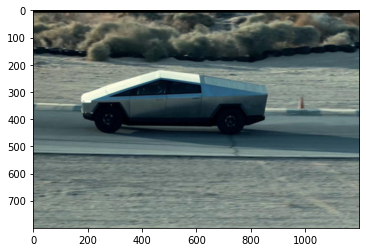

In [ ]:
y_max, x_max = target.shape[:-1]
y_min, x_min = 0, 0
x_range = x_max - x_min
y_range = y_max - y_min

M = np.float32([[1, 0, offset[0]], [0, 1, offset[1]]])
source = cv2.warpAffine(source, M, (x_range, y_range)) # Affine Transformation represents a relation between two images - 2x3 matrix

print('Source image:', source.shape[:-1])
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.show()

### Convert the mask's value and Laplacian inside region

In [ ]:
# convert the mask's value to [0,1]
mask = mask[y_min:y_max, x_min:x_max]
mask[mask != 0] = 1

# generate matrix A and get Laplacian matrix
mat_A = laplacian_matrix(y_range, x_range)
laplacian = mat_A.tocsc()

# Laplacian operator inside the blending region only
for y in range(1, y_range - 1):
    for x in range(1, x_range - 1):
        if mask[y, x] == 0:
            k = x + y * x_range
            mat_A[k, k] = 1
            mat_A[k, k + 1] = 0
            mat_A[k, k - 1] = 0
            mat_A[k, k + x_range] = 0
            mat_A[k, k - x_range] = 0

mat_A

<960000x960000 sparse matrix of type '<class 'numpy.float64'>'
	with 1503596 stored elements in List of Lists format>

In [ ]:
mat_A = mat_A.tocsc() # Convert matrix A to Compressed Sparse Column format
mat_A

<960000x960000 sparse matrix of type '<class 'numpy.float64'>'
	with 1503596 stored elements in Compressed Sparse Column format>

### Blend and Display Result

In [ ]:
# blend
mask_flat = mask.flatten()    
for channel in range(source.shape[2]):
    source_flat = source[y_min:y_max, x_min:x_max, channel].flatten() # flatten source
    target_flat = target[y_min:y_max, x_min:x_max, channel].flatten() # flatten target

    # inside the mask:
    # \Delta f = div v = \Delta g       
    alpha = 1
    mat_b = laplacian.dot(source_flat)*alpha

    # outside the mask:
    # f = t
    mat_b[mask_flat == 0] = target_flat[mask_flat == 0]
    
    x = spsolve(mat_A, mat_b) # Solve the sparse linear system Ax=b
    x = x.reshape((y_range, x_range))
    x[x > 255] = 255
    x[x < 0] = 0
    x = x.astype('uint8')
    
    target[y_min:y_max, x_min:x_max, channel] = x

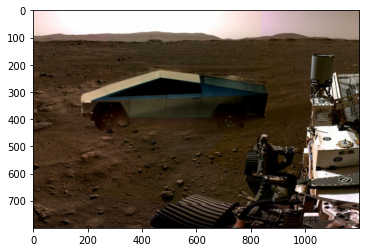

In [ ]:
# display result
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.show()